[菜鸟教程-numpy](https://www.runoob.com/numpy/numpy-tutorial.html)

## 导包

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  #默认为'last'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
import time
import os
import sys
import random
from numpy import linalg
np.set_printoptions(threshold=np.inf, precision=2, suppress=True)

# 基本

# 线性代数

##### 创建矩阵

In [2]:
# a = np.array([])
np.random.seed(2020)
A = np.random.randint(0, 10, size=(3, 3))
A

array([[0, 8, 3],
       [6, 3, 3],
       [7, 8, 0]])

## 行列式
* det()

In [83]:
A = np.array([3,-2,2,1]).reshape(2,2)
linalg.det(A)

6.999999999999999

## 逆矩阵  
* inv()

In [3]:
A_1 = linalg.inv(A)
A_1
A@A_1
A_1@A

array([[-0.1 ,  0.1 ,  0.06],
       [ 0.08, -0.08,  0.07],
       [ 0.11,  0.22, -0.19]])

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0.,  0.,  1.]])

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0.,  0.,  1.]])

## 广义逆矩阵
* pinv()

In [82]:
A = np.mat("4 11 14;8 7 -2")
# 使用pinv函数计算广义逆矩阵
pseudoinv = linalg.pinv(A)
pseudoinv
A.shape
pseudoinv.shape
A@pseudoinv
pseudoinv@A

matrix([[-0.01,  0.07],
        [ 0.02,  0.04],
        [ 0.06, -0.06]])

(2, 3)

(3, 2)

matrix([[1., 0.],
        [0., 1.]])

matrix([[ 0.56,  0.44, -0.22],
        [ 0.44,  0.56,  0.22],
        [-0.22,  0.22,  0.89]])

In [74]:
help(linalg.pinv)

Help on function pinv in module numpy.linalg:

pinv(a, rcond=1e-15)
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.
    
    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.
    
    .. versionchanged:: 1.14
       Can now operate on stacks of matrices
    
    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values smaller (in modulus) than
        `rcond` * largest_singular_value (again, in modulus)
        are set to zero. Broadcasts against the stack of matrices
    
    Returns
    -------
    B : (..., N, M) ndarray
        The pseudo-inverse of `a`. If `a` is a `matrix` instance, then so
        is `B`.
    
    Raises
    ------
    LinAlgError
        If the SVD computation does not converge.
    
    Notes
    -

## 解线性方程

* solve()

In [8]:
B = np.array([1, -2, 1, 0, 2, -8, -4, 5, 9]).reshape(3, 3)
b = np.array([0, 8, -9])
# 调用solve函数求解线性方程
C = np.linalg.solve(B, b)
C

array([29., 16.,  3.])

## 特征值和特征向量
* eigvals() &nbsp;只返回特征值
* eig() &nbsp; 返回特征值和特征向量

In [35]:
# A = np.array([3, -1, -1, 3]).reshape(2, 2)
# A = np.array([3, -2, 1, 0]).reshape(2, 2)
A = np.array([-1,1,0,-4,3,0,1,0,2]).reshape(3, 3)
A
eigenvalues_ = linalg.eigvals(A)
eigenvalues, eigenvectors = linalg.eig(A)
eigenvalues_
eigenvalues
eigenvalues = np.diag(eigenvalues) # 化对角阵
eigenvalues
eigenvectors # 列向量
"***"
# 验证，注意顺序
A@eigenvectors
eigenvectors@eigenvalues
# for i in eigenvalues_:
#     i*eigenvectors.T

array([[-1,  1,  0],
       [-4,  3,  0],
       [ 1,  0,  2]])

array([2., 1., 1.])

array([2., 1., 1.])

array([[2., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[ 0.  ,  0.41,  0.41],
       [ 0.  ,  0.82,  0.82],
       [ 1.  , -0.41, -0.41]])

'***'

array([[ 0.  ,  0.41,  0.41],
       [ 0.  ,  0.82,  0.82],
       [ 2.  , -0.41, -0.41]])

array([[ 0.  ,  0.41,  0.41],
       [ 0.  ,  0.82,  0.82],
       [ 2.  , -0.41, -0.41]])

## 奇异值分解

* 函数：np.linalg.svd(a,full_matrices=1,compute_uv=1)。  
* 参数：a是一个形如(M,N)矩阵full_matrices的取值是为0或者1，默认值为1，这时u的大小为(M,M)，v的大小为(N,N) 。否则u的大小为(M,K)，v的大小为(K,N) ，K=min(M,N)。compute_uv的取值是为0或者1，默认值为1，表示计算u,s,v。为0的时候只计算s。  
* 返回值：总共有三个返回值u,s,v  
    u大小为(M,M)，s大小为(M,N)，v大小为(N,N)。

<font color=blue>
关于奇异值的解释： <br> 
　　对于方阵而言$A=Q\sum Q^{-1}$  <br>
&emsp;&emsp;其中的$\sum$就是特征向量。但是对于不是方阵的矩阵而言就没有特征向量。 <br>  
&emsp;&emsp;非方阵的矩阵可以用奇异值分解来描述这个矩阵。A=$U\sum V^T$。其中U叫做左奇异值，$\sum$叫做奇异值，V叫做右奇异值。因为只有对角线的数不为0，并且数值是从大到小排列，所以一般只取r个，r的值越接近A的列数，那么三个矩阵的乘法得到的矩阵越接近A。   <br>
&emsp;&emsp;因为三个矩阵的面积之和远远小于原矩阵A，所以当我们向压缩空间表达A的时候，可以使用这三个矩阵。 <br>  
&emsp;&emsp;当A不是矩阵的时候，把A转置变为$A^T$。并且$A^T v=\lambda v$。其中的$v$就是右奇异值。$\partial = \sqrt{\lambda}$，这里的$\partial$就是上面的奇异值。$u=\frac{Av}{\partial}$，这里的u就是上面的左奇异值。 <br>
</font>

In [71]:
A = np.array([4, 11, 14, 8, 7, -2]).reshape(2,-1)
U,Sigma,V = np.linalg.svd(A,full_matrices=1)
A
U
Sigma = np.diag(Sigma)
Sigma
V
"***"

# U@Sigma
# U@Sigma@V
U[:,0]**2+U[:,1]**2
U[0,:]**2+U[1,:]**2
V[:,0]**2+V[:,1]**2+V[:,2]**2

# V[0,:]**2+V[1,:]**2+V[2,:]**2
# V[0,:]**2+V[1,:]**2
V@V.T

array([[ 4, 11, 14],
       [ 8,  7, -2]])

array([[-0.95, -0.32],
       [-0.32,  0.95]])

array([[18.97,  0.  ],
       [ 0.  ,  9.49]])

array([[-0.33, -0.67, -0.67],
       [ 0.67,  0.33, -0.67],
       [-0.67,  0.67, -0.33]])

'***'

array([1., 1.])

array([1., 1.])

array([1., 1., 1.])

array([[ 1., -0., -0.],
       [-0.,  1., -0.],
       [-0., -0.,  1.]])

In [72]:
data = np.mat([[1,2,3],[4,5,6]])
U,sigma,VT = np.linalg.svd(data)
U #[[-0.3863177  -0.92236578] [-0.92236578  0.3863177 ]]
sigma#[9.508032   0.77286964]
VT#[[-0.42866713 -0.56630692 -0.7039467 ] [ 0.80596391  0.11238241 -0.58119908] [ 0.40824829 -0.81649658  0.40824829]]


matrix([[-0.39, -0.92],
        [-0.92,  0.39]])

array([9.51, 0.77])

matrix([[-0.43, -0.57, -0.7 ],
        [ 0.81,  0.11, -0.58],
        [ 0.41, -0.82,  0.41]])

Help on function svd in module numpy.linalg:

svd(a, full_matrices=True, compute_uv=True)
    Singular Value Decomposition.
    
    When `a` is a 2D array, it is factorized as ``u @ np.diag(s) @ vh
    = (u * s) @ vh``, where `u` and `vh` are 2D unitary arrays and `s` is a 1D
    array of `a`'s singular values. When `a` is higher-dimensional, SVD is
    applied in stacked mode as explained below.
    
    Parameters
    ----------
    a : (..., M, N) array_like
        A real or complex array with ``a.ndim >= 2``.
    full_matrices : bool, optional
        If True (default), `u` and `vh` have the shapes ``(..., M, M)`` and
        ``(..., N, N)``, respectively.  Otherwise, the shapes are
        ``(..., M, K)`` and ``(..., K, N)``, respectively, where
        ``K = min(M, N)``.
    compute_uv : bool, optional
        Whether or not to compute `u` and `vh` in addition to `s`.  True
        by default.
    
    Returns
    -------
    u : { (..., M, M), (..., M, K) } array
        Unita

# API

## 属性  
1. nbytes(字节大小)

### nbytes

In [22]:
a = np.arange(100)
a.nbytes

400

## 方法

### np.random

#### np.random.choice

In [51]:
np.random.choice([1,2,3,4,5], 3, replace=False, p=[0.1, 0, 0.3, 0.6, 0])

array([4, 3, 1])

In [86]:
np.random.randint(0, 1)

0

In [87]:
random.randint(0, 1)

1

In [99]:
random.random()

0.8576706591475731

In [108]:
random.sample(range(100),5)

[55, 13, 11, 28, 3]

In [100]:
help(random.sample)

Help on method sample in module random:

sample(population, k) method of random.Random instance
    Chooses k unique random elements from a population sequence or set.
    
    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).
    
    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.
    
    To choose a sample in a range of integers, use range as an argument.
    This is especially fast and space efficient for sampling from a
    large population:   sample(range(10000000), 60)



### genfromtxt

In [19]:
data = np.genfromtxt('./datas/genfromtxt_01.txt',encoding='utf-8',dtype=np.dtype(str))
data

array('1,2,3,4,5', dtype='<U9')

In [21]:
data = np.genfromtxt('./datas/genfromtxt_01.txt',
                     delimiter=',',
                     encoding='utf-8',
                     dtype=np.dtype(float),
                     replace_space='')
data
data.nbytes # 字节大小

array([1., 2., 3., 4., 5.])

40

In [5]:
help(np.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings. The string

[[Python图像处理] 二十二.Python图像傅里叶变换原理及实现](https://blog.csdn.net/Eastmount/article/details/89474405)

### eimsum

[NumPy中einsum的基本介绍](https://cloud.tencent.com/developer/article/1369762)  
[einsum满足你一切需要：深度学习中的爱因斯坦求和约定](https://zhuanlan.zhihu.com/p/44954540)  


* 一维数组  

Call signature|Numpy equivalent|Description
:---:|:---:|:---:
('i',A)|A|返回数组A
('i->',A)|sum(A)|返回数组A的值的总和
('i,i->i',A,B)|A*B|数组A和数组B的元素依次相乘
('i,i',A,B)|inner(A,B)|A和B的点积(内积)
('i,j->ij',A,B)|outer(A,B)|A和B的叉积(外积)  

* 二维数组  

Call signature|Numpy equivalent|Description
:---:|:---:|:---:
('ij',A)|A|数组A
('ji',A)|A.T|数组A的转置
('ii->i',A)|diag(A)|数组A的主对角线
('ii',A)|trace(A)|数组A的主对角线的和
('ij->',A)|sum(A)|数组A的值相加
('ij->j',A)|sum(A)|数组A的列求和
('ij->i',A)|sum(A)|数组A的行求和
('ij,ij->ij',A,B)|A*B|数组A和B逐元素相乘
('ij,ji->ij',A,B)|A*B.T|数组A和B的转置逐元素相乘
('ij,jk',A,B)|dot(A,B)|数组A的与B的矩阵乘法
('ij,kj->ik',A,B)|inner(A,B)|数组A的与B的矩阵乘法
('ij,kj->ikj',A,B)|A\[:,None\]*B|数组A的每一行乘以B
('ij,kl->ijkl',A,B)|A\[:,:,None,None\]*B|数组A的每个值乘以B


#### 一维数组

In [20]:
a = np.array([0,1,2])
b = np.array([1,2,3])
c = np.arange(9).reshape(3,3)
np.einsum('i->',a)
np.einsum('i,i->i',a,b)
np.einsum('i,i',a,b)
np.einsum('i,j->ij',a,b)
# np.einsum('i,jk->ijk',a,b)

3

array([0, 2, 6])

8

array([[0, 0, 0],
       [1, 2, 3],
       [2, 4, 6]])

#### 二维数组

In [29]:
a = np.arange(9.).reshape(3,3)
b = np.arange(9.).reshape(3,3)
a
b
np.einsum('ij->',a)
np.einsum('ij->j',a)
np.einsum('ij->i',a)

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

36.0

array([ 9., 12., 15.])

array([ 3., 12., 21.])

In [32]:
np.einsum('ij,jk',a,b)
np.dot(a,b)
np.einsum('ij,ij',a,b)
np.inner(a,b)

array([[ 15.,  18.,  21.],
       [ 42.,  54.,  66.],
       [ 69.,  90., 111.]])

array([[ 15.,  18.,  21.],
       [ 42.,  54.,  66.],
       [ 69.,  90., 111.]])

204.0

array([[  5.,  14.,  23.],
       [ 14.,  50.,  86.],
       [ 23.,  86., 149.]])

In [52]:
a
# b
np.einsum('ij,kj->ikj',a,b)
a[:,None].shape
a[:,None]*b


array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

array([[[ 0.,  1.,  4.],
        [ 0.,  4., 10.],
        [ 0.,  7., 16.]],

       [[ 0.,  4., 10.],
        [ 9., 16., 25.],
        [18., 28., 40.]],

       [[ 0.,  7., 16.],
        [18., 28., 40.],
        [36., 49., 64.]]])

(3, 1, 3)

array([[[ 0.,  1.,  4.],
        [ 0.,  4., 10.],
        [ 0.,  7., 16.]],

       [[ 0.,  4., 10.],
        [ 9., 16., 25.],
        [18., 28., 40.]],

       [[ 0.,  7., 16.],
        [18., 28., 40.],
        [36., 49., 64.]]])

In [60]:
# a[:,:,None,None]
# a[:,:,None,None]*b
np.einsum('ij,kl->ijkl',a,b).shape

(3, 3, 3, 3)

In [58]:
A = np.arange(12.).reshape(3,4)
B = np.arange(9.).reshape(3,3)
A.T
B
np.einsum('ij,ik->ijk',A,B)
# np.einsum('ij,kl->ijkl',a,b)

array([[ 0.,  4.,  8.],
       [ 1.,  5.,  9.],
       [ 2.,  6., 10.],
       [ 3.,  7., 11.]])

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

array([[[ 0.,  0.,  0.],
        [ 0.,  1.,  2.],
        [ 0.,  2.,  4.],
        [ 0.,  3.,  6.]],

       [[12., 16., 20.],
        [15., 20., 25.],
        [18., 24., 30.],
        [21., 28., 35.]],

       [[48., 56., 64.],
        [54., 63., 72.],
        [60., 70., 80.],
        [66., 77., 88.]]])

## np.poly1d


In [21]:
p = np.poly1d([1, 2, 3])
a = np.array([1,2,3])
p(a)
1+2*a+3*a**2
3+2*a+a**2 # 结果
p.c # array([1, 2, 3])
p.order # 2
p.r # array([-1.+1.41j, -1.-1.41j])
p**2

array([ 6, 11, 18])

array([ 6, 17, 34])

array([ 6, 11, 18])

array([1, 2, 3])

2

array([-1.+1.41j, -1.-1.41j])

poly1d([ 1,  4, 10, 12,  9])

In [3]:
np.random.rand(1)

array([0.63])

In [19]:
help(np.poly1d)

Help on class poly1d in module numpy:

class poly1d(builtins.object)
 |  poly1d(c_or_r, r=False, variable=None)
 |  
 |  A one-dimensional polynomial class.
 |  
 |  A convenience class, used to encapsulate "natural" operations on
 |  polynomials so that said operations may take on their customary
 |  form in code (see Examples).
 |  
 |  Parameters
 |  ----------
 |  c_or_r : array_like
 |      The polynomial's coefficients, in decreasing powers, or if
 |      the value of the second parameter is True, the polynomial's
 |      roots (values where the polynomial evaluates to 0).  For example,
 |      ``poly1d([1, 2, 3])`` returns an object that represents
 |      :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2, 3], True)`` returns
 |      one that represents :math:`(x-1)(x-2)(x-3) = x^3 - 6x^2 + 11x -6`.
 |  r : bool, optional
 |      If True, `c_or_r` specifies the polynomial's roots; the default
 |      is False.
 |  variable : str, optional
 |      Changes the variable used when printi

# 傅里叶变换  

[python做傅里叶变换](https://www.cnblogs.com/LXP-Never/p/11558302.html)

(1000,)

(1000,)
complex128
(-2.1458390619955026e-12+0j)


D:\MySoft\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Frequency Domain')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Power')

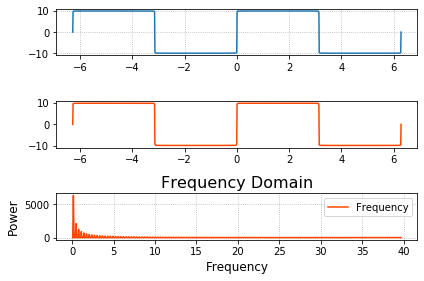

In [2]:
import numpy.fft as fft

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

n = 1000
y = np.zeros(x.size)
y.shape
for i in range(1, n + 1):
    y += 4 * np.pi / (2 * i - 1) * np.sin((2 * i - 1) * x)
# y
complex_array = fft.fft(y)
# complex_array
print(complex_array.shape)  # (1000,) 
print(complex_array.dtype)  # complex128 
print(complex_array[0])  # (-2.1458390619955026e-12+0j)
y_new = fft.ifft(complex_array)
# y - y_new
plt.subplot(311)
plt.grid(linestyle=':')
plt.plot(x, y, label='y')  # y是1000个相加后的正弦序列
plt.subplot(312)
plt.plot(x, y_new, label='y_new', color='orangered')  # y是ifft变换后的序列

# 得到分解波的频率序列
freqs = fft.fftfreq(x.size, x[1] - x[0])
# freqs
# 复数的模为信号的振幅（能量大小）
complex_array = fft.fft(y)
pows = np.abs(complex_array)

plt.subplot(313)
plt.title('Frequency Domain', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.plot(freqs[freqs > 0], pows[freqs > 0], c='orangered', label='Frequency')
plt.legend()
plt.tight_layout()
plt.show()


## 频域信号处理

In [7]:
x = np.random.rand(8)
xf = np.fft.fft(x)
x
xf
np.real(np.fft.ifft(xf))

array([0.92, 0.57, 0.92, 0.8 , 0.29, 0.47, 0.17, 0.57])

array([ 4.71+0.j  ,  0.54-0.98j,  0.12+0.33j,  0.72+0.53j, -0.1 +0.j  ,
        0.72-0.53j,  0.12-0.33j,  0.54+0.98j])

array([0.92, 0.57, 0.92, 0.8 , 0.29, 0.47, 0.17, 0.57])

In [ ]:
x = np.ones(8)
# x = np.arange(8)
xf = np.fft.fft(x)
x
xf

In [12]:
x0 = np.arange(0,2*np.pi,2*np.pi/8)
x = np.sin(x0)
xf = np.fft.fft(x)
x
xf
xf/len(x)

array([ 0.  ,  0.71,  1.  ,  0.71,  0.  , -0.71, -1.  , -0.71])

array([ 0.+0.j, -0.-4.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
       -0.+4.j])

array([ 0.+0.j , -0.-0.5j,  0.-0.j ,  0.+0.j ,  0.+0.j ,  0.+0.j ,
        0.+0.j , -0.+0.5j])

In [13]:
x0 = np.arange(0,2*np.pi,2*np.pi/8)
x = np.cos(x0)
xf = np.fft.fft(x)
x
xf
xf/len(x)

array([ 1.  ,  0.71,  0.  , -0.71, -1.  , -0.71, -0.  ,  0.71])

array([-0.+0.j,  4.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,
        4.+0.j])

array([-0. +0.j,  0.5-0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. -0.j,
        0. +0.j,  0.5+0.j])

In [22]:
x = np.arange(0,2*np.pi,2*np.pi/8)
tmp = np.fft.fft(2*np.sin(2*x))/len(x)
np.array_str(tmp,suppress_small=True)

tmp = np.fft.fft(2*np.sin(3*x))/len(x)
np.array_str(tmp,suppress_small=True)

tmp = np.fft.fft(np.sin(1*x)+np.cos(x))/len(x)
np.array_str(tmp,suppress_small=True)

tmp = np.fft.fft(np.exp(x))/len(x)
np.array_str(tmp,suppress_small=True)

'[ 0.+0.j  0.+0.j -0.-1.j  0.-0.j  0.+0.j  0.+0.j -0.+1.j  0.-0.j]'

'[-0.+0.j  0.-0.j  0.+0.j -0.-1.j  0.+0.j -0.+1.j  0.-0.j  0.+0.j]'

'[-0. +0.j   0.5-0.5j  0. -0.j   0. -0.j   0. +0.j   0. +0.j   0. +0.j\n  0.5+0.5j]'

'[ 55.99 +0.j    13.59+38.25j -11.5 +25.22j -19.12+11.63j -20.92 +0.j\n -19.12-11.63j -11.5 -25.22j  13.59-38.25j]'

1.4138130495871821

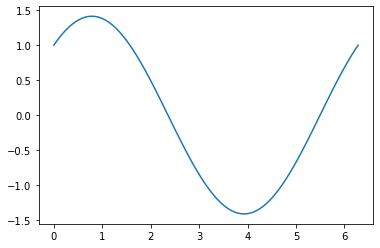

In [21]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)+np.cos(x)
plt.plot(x,y)
np.max(y)

In [46]:
x = np.arange(0,2*np.pi,2*np.pi/128)
y = 0.3*np.cos(x)+0.5*np.cos(2*x+np.pi/4)+0.8*np.cos(3*x-np.pi/3)
yf = np.fft.fft(y)/len(y)
np.array_str(yf[:8],suppress_small=True)
i = 2
yf[i]
np.abs(yf[i]) # 模
np.angle(yf[i]) # 弧度
np.rad2deg(np.angle(yf[i])) # 角度

'[ 0.  +0.j    0.15-0.j    0.18+0.18j  0.2 -0.35j  0.  -0.j    0.  +0.j\n  0.  +0.j   -0.  +0.j  ]'

(0.17677669529663692+0.17677669529663698j)

0.2500000000000001

0.7853981633974485

45.000000000000014

In [29]:
help(np.angle)

Help on function angle in module numpy:

angle(z, deg=False)
    Return the angle of the complex argument.
    
    Parameters
    ----------
    z : array_like
        A complex number or sequence of complex numbers.
    deg : bool, optional
        Return angle in degrees if True, radians if False (default).
    
    Returns
    -------
    angle : ndarray or scalar
        The counterclockwise angle from the positive real axis on the complex
        plane in the range ``(-pi, pi]``, with dtype as numpy.float64.
    
        ..versionchanged:: 1.16.0
            This function works on subclasses of ndarray like `ma.array`.
    
    See Also
    --------
    arctan2
    absolute
    
    Examples
    --------
    >>> np.angle([1.0, 1.0j, 1+1j])               # in radians
    array([ 0.        ,  1.57079633,  0.78539816]) # may vary
    >>> np.angle(1+1j, deg=True)                  # in degrees
    45.0



### 合成时域信号

D:\MySoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'frequency bin')

Text(0, 0.5, 'dB')

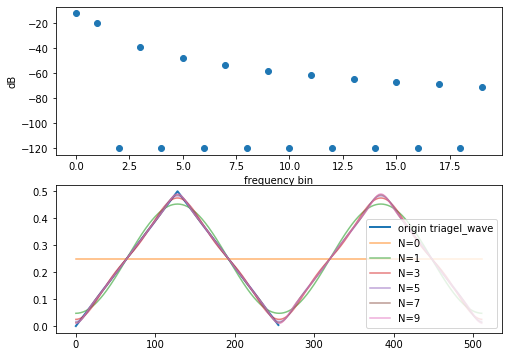

In [80]:
def triangle_wave(size):
    x = np.arange(0, 1, 1.0 / size)
    y = np.where(x < 0.5, x, 0)
    #     print("y1",y)
    y = np.where(x >= 0.5, 1 - x, y)
    #     print("y2",y)
    return x, y


def fft_combine(bins, n, loops=1):
    length = len(bins) * loops
    #     print("length",length)
    data = np.zeros(length)

#     index = loops * np.arange(0, length, 1.0) / length * (2 * np.pi)
    index = np.arange(0, length, 1.0) / len(bins) * (2 * np.pi)
#     index = np.linspace(0,2*np.pi,length)
#     print("index", index)
    for k, p in enumerate(bins[:n]):
        if k != 0:
            p *= 2
        data += np.real(p) * np.cos(k * index)
        data -= np.imag(p) * np.sin(k * index)
    return index, data


fft_size = 256
x, y = triangle_wave(fft_size)
fy = np.fft.fft(y) / fft_size
# print(fy*20)
# print("fy", len(fy), fy.shape)
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
axes[0].plot(np.clip(20 * np.log10(np.abs(fy[:20])), -120, 120), 'o')
axes[0].set_xlabel(u"frequency bin")
axes[0].set_ylabel(u"dB")

axes[1].plot(y, label=u"origin triagel_wave", linewidth=2)
for i in [0, 1, 3, 5, 7, 9]:
    index, data = fft_combine(fy, i + 1, 2)
    axes[1].plot(data, label="N=%s" % i, alpha=0.6)
axes[1].legend(loc="best")

D:\MySoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'frequency bin')

Text(0, 0.5, 'dB')

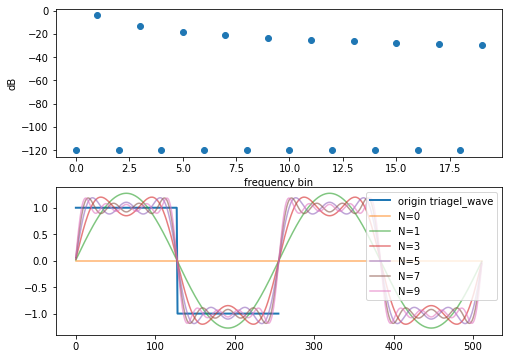

In [82]:
def triangle_wave(size):
    x = np.arange(0, 1, 1.0 / size)
    y = np.where(x < 0.5, 1.0, -1.0)
    #     print("y1",y)
#     y = np.where(x >= 0.5, 1 - x, y)
    #     print("y2",y)
    return x, y


def fft_combine(bins, n, loops=1):
    length = len(bins) * loops
    #     print("length",length)
    data = np.zeros(length)

#     index = loops * np.arange(0, length, 1.0) / length * (2 * np.pi)
    index = np.arange(0, length, 1.0) / len(bins) * (2 * np.pi)
#     index = np.linspace(0,2*np.pi,length)
#     print("index", index)
    for k, p in enumerate(bins[:n]):
        if k != 0:
            p *= 2
        data += np.real(p) * np.cos(k * index)
        data -= np.imag(p) * np.sin(k * index)
    return index, data


fft_size = 256
x, y = triangle_wave(fft_size)
fy = np.fft.fft(y) / fft_size
# print(fy*20)
# print("fy", len(fy), fy.shape)
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
axes[0].plot(np.clip(20 * np.log10(np.abs(fy[:20])), -120, 120), 'o')
axes[0].set_xlabel(u"frequency bin")
axes[0].set_ylabel(u"dB")

axes[1].plot(y, label=u"origin triagel_wave", linewidth=2)
for i in [0, 1, 3, 5, 7, 9]:
    index, data = fft_combine(fy, i + 1, 2)
    axes[1].plot(data, label="N=%s" % i, alpha=0.6)
axes[1].legend(loc="best")

### 观察信号的频谱

freqs (257,)
index (array([10, 15], dtype=int64),)
[-6.02 -0.  ]


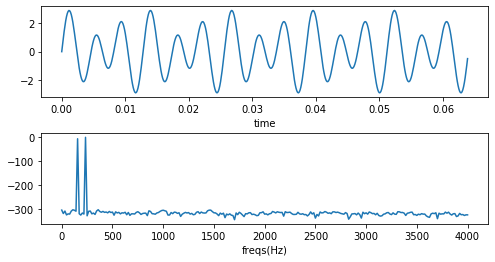

In [116]:
sampling_rate, fft_size = 8000, 512
t = np.arange(0, 1.0, 1.0 / sampling_rate)
x = np.sin(2 * np.pi * 156.25 * t) + 2 * np.sin(2 * np.pi * 234.375 * t)


def show_fft(x):
    xs = x[:fft_size]
    xf = np.fft.rfft(xs) / fft_size
#     xf = np.fft.fft(xs) / fft_size
#     print("xf",xf.shape,xf1.shape)
#     print(sampling_rate // 2, fft_size // 2 + 1)
    
    freqs = np.linspace(0, sampling_rate / 2, int(fft_size / 2 + 1))
    print("freqs",freqs.shape)
#     print("np.abs(xf)",20*np.abs(xf))
    xf_abs = np.abs(xf)
#     print(xf_abs)
    idx = np.nonzero(np.abs(xf)>0.01)
    print("index",idx)# 大于阈值的索引
    
    xfp = 20 * np.log10(np.clip(np.abs(xf),1e-20,1e100))
    
    print(xfp[idx])
#     print("xft",xf.shape,xfp.shape,xfp)
    plt.figure(figsize=(8, 4))
    plt.subplot(211)
    plt.plot(t[:fft_size], xs)
    plt.xlabel(u"time")
    plt.subplot(212)
    plt.plot(freqs, xfp)
    plt.xlabel(u"freqs(Hz)")
    plt.subplots_adjust(hspace=0.4)
#     plt.show()


show_fft(x)


In [92]:
x = np.random.randn(8)
np.fft.fft(x)
np.fft.rfft(x)

array([ 1.92+0.j  , -0.03-0.25j, -2.45-1.1j , -1.52+1.18j, -3.05+0.j  ,
       -1.52-1.18j, -2.45+1.1j , -0.03+0.25j])

array([ 1.92+0.j  , -0.03-0.25j, -2.45-1.1j , -1.52+1.18j, -3.05+0.j  ])

In [93]:
help(np.fft.rfft)

Help on function rfft in module numpy.fft:

rfft(a, n=None, axis=-1, norm=None)
    Compute the one-dimensional discrete Fourier Transform for real input.
    
    This function computes the one-dimensional *n*-point discrete Fourier
    Transform (DFT) of a real-valued array by means of an efficient algorithm
    called the Fast Fourier Transform (FFT).
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        Number of points along transformation axis in the input to use.
        If `n` is smaller than the length of the input, the input is cropped.
        If it is larger, the input is padded with zeros. If `n` is not given,
        the length of the input along the axis specified by `axis` is used.
    axis : int, optional
        Axis over which to compute the FFT. If not given, the last axis is
        used.
    norm : {None, "ortho"}, optional
        .. versionadded:: 1.10.0
    
        Normalization mode (see `numpy.fft`). Default 

# End

In [3]:
np.log(2.71828)
np.log2(2)
np.log10(10)


0.999999327347282

1.0

1.0

In [7]:
np.log(5)/np.log(3)
np.log2(5)/np.log2(3)

1.4649735207179269

1.464973520717927